In [4]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D , MaxPooling1D , Flatten , Dropout , BatchNormalization
from sklearn.preprocessing import LabelBinarizer

In [2]:
df = pd.read_csv('my_complete_data.csv')
df.head(5)

,0X,0Y,0Z,1X,1Y,1Z,2X,2Y,2Z,3X,...,18X,18Y,18Z,19X,19Y,19Z,20X,20Y,20Z,Target
0,0,0,0,0.001693,-0.063222,-0.002705,0.021882,-0.112794,-0.009597,0.044851,...,0.066708,-0.030895,-0.033927,0.050479,-0.026789,-0.030957,0.041690,-0.018269,-0.023261,0
1,0,0,0,0.000931,-0.064636,-0.002121,0.020259,-0.113972,-0.009384,0.042877,...,0.066659,-0.036098,-0.034239,0.050206,-0.031295,-0.031593,0.041427,-0.022557,-0.024197,0
2,0,0,0,0.002767,-0.065940,0.000373,0.022642,-0.115790,-0.005661,0.045305,...,0.067626,-0.037651,-0.031017,0.051662,-0.032724,-0.028540,0.042304,-0.023962,-0.022850,0
3,0,0,0,0.006193,-0.074820,-0.002584,0.023967,-0.128494,-0.007752,0.045358,...,0.079475,-0.042377,-0.031214,0.064469,-0.037796,-0.032928,0.050491,-0.028083,-0.026147,0
4,0,0,0,0.005760,-0.071437,-0.001886,0.025458,-0.125086,-0.007858,0.048182,...,0.078772,-0.033679,-0.040696,0.061942,-0.029879,-0.041286,0.047523,-0.019828,-0.033568,0


In [3]:
y_train = df['Target']
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)

In [4]:
del df['Target']
del df['0X']
del df['0Y']
del df['0Z']

In [5]:
x = df.values
x

array([[ 0.00169295, -0.06322211, -0.00270481, ...,  0.04169005,
        -0.018269  , -0.02326144],
       [ 0.00093079, -0.06463558, -0.00212076, ...,  0.04142678,
        -0.0225575 , -0.02419703],
       [ 0.00276697, -0.06593955,  0.00037269, ...,  0.04230434,
        -0.02396154, -0.02284959],
       ...,
       [-0.01036292,  0.05514544, -0.02261073, ..., -0.12730092,
        -0.04435897, -0.03524519],
       [-0.01055127,  0.05474597, -0.01822193, ..., -0.12355578,
        -0.04153284, -0.04090385],
       [-0.00896686,  0.05548298, -0.02743807, ..., -0.12672871,
        -0.04446638, -0.0339655 ]])

In [6]:
y = y_train
y.shape

(15067, 37)

In [7]:
x = np.expand_dims(x,-1)
x.shape

(15067, 60, 1)

In [8]:
model = Sequential()

model.add(Conv1D(filters=64, kernel_size=3, activation='relu',input_shape=(60,1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(748, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(37, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 58, 64)            256       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 56, 64)            12352     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 28, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 26, 128)           24704     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 24, 128)           49280     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 12, 128)           0         
_________________________________________________________________
flatten (Flatten)            (None, 1536)              0

In [9]:
history = model.fit(x, y,validation_data = (x,y), epochs=5, batch_size=64)

Epoch 1/5
236/236 [==============================] - 17s 73ms/step - loss: 0.9443 - accuracy: 0.7315 - val_loss: 0.1045 - val_accuracy: 0.9780
Epoch 2/5
236/236 [==============================] - 15s 64ms/step - loss: 0.1021 - accuracy: 0.9760 - val_loss: 0.0540 - val_accuracy: 0.9868
Epoch 3/5
236/236 [==============================] - 16s 66ms/step - loss: 0.0691 - accuracy: 0.9817 - val_loss: 0.0470 - val_accuracy: 0.9881
Epoch 4/5
236/236 [==============================] - 15s 66ms/step - loss: 0.0601 - accuracy: 0.9833 - val_loss: 0.0378 - val_accuracy: 0.9890
Epoch 5/5
236/236 [==============================] - 16s 66ms/step - loss: 0.0471 - accuracy: 0.9873 - val_loss: 0.0392 - val_accuracy: 0.9883


In [10]:
y_pred = model.predict(x)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y)):
    test.append(np.argmax(y[i]))

In [11]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 98.8252472290436


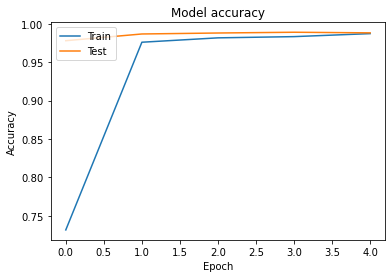

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [13]:
model.save("my_img_model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: my_img_model\assets


In [5]:
from keras.models import load_model
model=load_model("my_img_model")

In [ ]:
import cv2
Char="0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ$"
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands


password="PRINCE"
passlist=[]
psw=""
for i in range(37):
    passlist.append(0)
# text cv2 puttext

font                   = cv2.FONT_HERSHEY_SIMPLEX
location = (100,50)
fontScale              = 1
fontColor              = (255,255,255)
lineType               = 2


# For webcam input:
hands = mp_hands.Hands(
    min_detection_confidence=0.5, min_tracking_confidence=0.5)
cap = cv2.VideoCapture(0)
while cap.isOpened():
    success, image = cap.read()
    if not success:
        break

  # Flip the image horizontally for a later selfie-view display, and convert
  # the BGR image to RGB.
    image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)
  # To improve performance, optionally mark the image as not writeable to
  # pass by reference.
    image.flags.writeable = False
    results = hands.process(image)

  # Draw the hand annotations on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    if results.multi_hand_landmarks:
        L=[]
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
            land = hand_landmarks
            val = land.landmark
            first=val[0];
            for j in val:
                L.append(j.x-first.x);
                L.append(j.y-first.y);
                L.append(j.z-first.z);
            break
        L=L[3::]
        L=np.array(L)
        x = np.expand_dims(L,0)
        x = np.expand_dims(x,-1)
        fi=int(np.argmax(model.predict(x)))
        if passlist[fi]>20:
            if Char[fi]!="$":
                psw=psw+Char[fi]
            else:
                psw=""
            print(psw)
            passlist=[]
            for i in range(37):
                passlist.append(0)     
        else:
            passlist[fi]+=1
        text=Char[fi]
        cv2.putText(image,text, (0,50), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,255), 3, cv2.LINE_AA)
    else:
        cv2.putText(image,'No Hands!', location, font, fontScale,fontColor,lineType)
    if(psw==password):
        cv2.imshow("MediaPipe Hands", image)
        print("OK PASSWORD Verified!!!")
        break
    cv2.imshow('MediaPipe Hands', image)
    key = cv2.waitKey(1)
    if key == 27:
        break
hands.close()
cap.release()
cv2.destroyAllWindows()

5
55
555

5
55
555
5557
55575
